Dataset loaded. Sample data:
                                      title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  
0  In the 22nd century, a paraplegic Marine is di...  
1  Captain Barbossa, long believed to be dead, ha...  
2  A cryptic message from Bond’s past sends him o...  
3  Following the death of District Attorney Harve...  
4  John Carter is a war-weary, former military ca...  

TF-IDF matrix shape: (4803, 20978)

Top 5 recommendations for 'The Dark Knight Rises':
                                     title  vote_average  vote_count
0                          The Dark Knight           8.2       12002
1                           Batman Forever           5.2        1498
2                           Batman Returns           6.6       

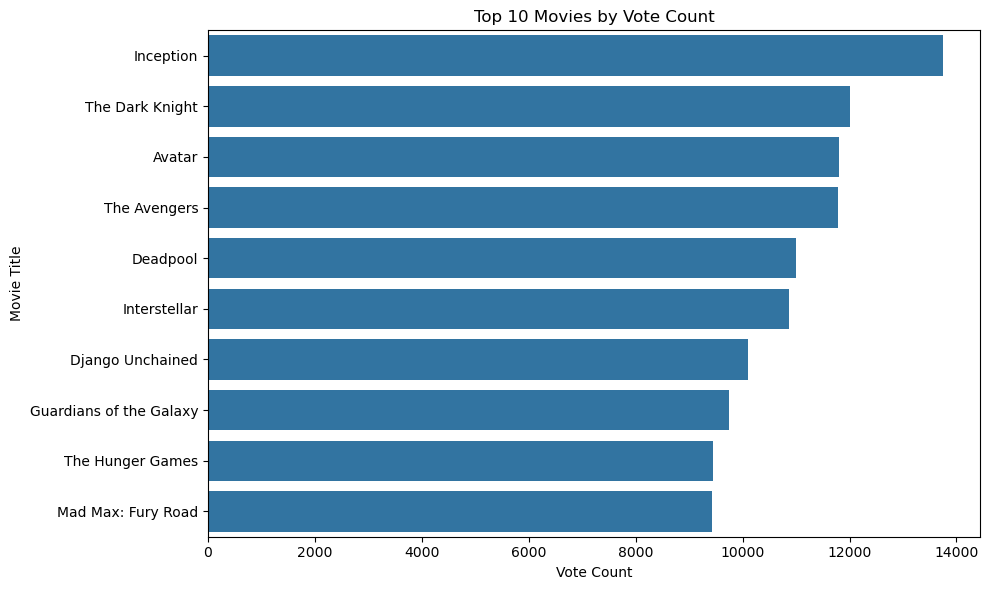

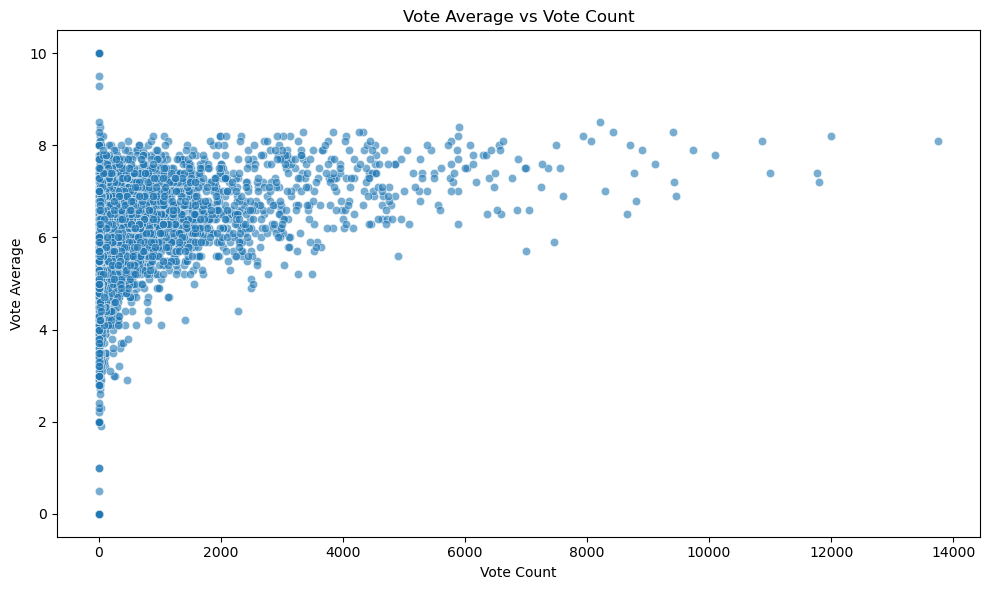

In [4]:
# Movie Recommendation System using ML (Content-Based)

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------
# 1. Load the dataset
# ----------------------------
df = pd.read_csv('tmdb_5000_movies.csv')

# Show basic info
print("Dataset loaded. Sample data:")
print(df[['title', 'overview']].head())

# ----------------------------
# 2. Preprocessing
# ----------------------------
# Fill missing overviews with empty string
df['overview'] = df['overview'].fillna('')

# ----------------------------
# 3. TF-IDF Vectorization
# ----------------------------
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['overview'])

print(f"\nTF-IDF matrix shape: {tfidf_matrix.shape}")

# ----------------------------
# 4. Cosine Similarity Matrix
# ----------------------------
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# ----------------------------
# 5. Reverse Mapping: Title -> Index
# ----------------------------
indices = pd.Series(df.index, index=df['title']).drop_duplicates()

# ----------------------------
# 6. Recommendation Function
# ----------------------------
def recommend(title, num_recommendations=5):
    idx = indices.get(title)
    if idx is None:
        print(f"Movie '{title}' not found in database.")
        return pd.DataFrame()

    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:num_recommendations+1]  # Exclude the input movie

    movie_indices = [i[0] for i in sim_scores]
    recommended = df[['title', 'vote_average', 'vote_count']].iloc[movie_indices]

    print(f"\nTop {num_recommendations} recommendations for '{title}':")
    return recommended.reset_index(drop=True)

# ----------------------------
# 7. Example: Get Recommendations
# ----------------------------
title_to_search = "The Dark Knight Rises"
recommendations = recommend(title_to_search, 5)
print(recommendations)

# ----------------------------
# 8. Visualizations
# ----------------------------

# Plot: Top 10 movies by vote count
top_movies = df.sort_values('vote_count', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='vote_count', y='title', data=top_movies)
plt.title('Top 10 Movies by Vote Count')
plt.xlabel('Vote Count')
plt.ylabel('Movie Title')
plt.tight_layout()
plt.show()

# Plot: Vote Average vs Vote Count
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='vote_count', y='vote_average', alpha=0.6)
plt.title('Vote Average vs Vote Count')
plt.xlabel('Vote Count')
plt.ylabel('Vote Average')
plt.tight_layout()
plt.show()